# REGRESIÓN LINEAL MULTIVARIABLE

**Obtejivo**
Amplíe nuestras rutinas de modelo de regresión para admitir múltiples funciones

*   Utilice NumPy np.dot para vectorizar sus implementaciones para mayor velocidad y simplicidad
*   Reescriba las rutinas de predicción, costo y gradiente para admitir múltiples funciones



#Bibliotecas
En este laboratorio, haremos uso de:

*   **NumPy**, una biblioteca popular para computación científica
*   **Matplotlib**, una biblioteca popular para trazar datos




In [55]:
import copy, math
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision=2)  # reduced display precision on numpy arrays

import pandas as pd

# 1. Notación
Notación utilizada en la implementación de funciones.

|Notación <img width=70/> <br />  General  <img width=70/> | Descripión<img width=350/>| Código Python |
|: ------------|: ------------------------------------------------------------||
| **Regression** |         |    |     |
|  $\mathbf{X}$ | Vector de características de ejemplos de entrenamiento                  | `X_train` |   
|  $\mathbf{y}$  | ejemplos de entrenamiento de la variable objetivo             | `y_train` 
|  $\mathbf{x}^{(i)}$, $y^{(i)}$ | $i_{th}$Ejemplo de entrenamiento | `X[i]`, `y[i]`|
| m | número de ejemplos de entrenamiento | `m`|
| n | número de características en un ejemplo | `n`|
|  $\mathbf{w}$  |  parámetro: pesos,                       | `w`    |
|  $b$           |  parámetro: bias                                           | `b`    |     
| $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$ | El resultado de la evaluación del modelo en $\mathbf{x^{(i)}}$ parametrizados por  $\mathbf{w},b$: $f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \mathbf{w} \cdot \mathbf{x}^{(i)}+b$  | `f_wb` | 

# 2.Problema



In [56]:
# IMPORTAR BASE DE DATOS 
datos_nuevos = pd.read_excel("datos_normalizados.xlsx")
datos_nuevos

,year,seats,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,selling_price
0,0.047977,-0.440093,1.338389,-0.889557,0.27759,0.385135,-0.666598,0.999676,-0.423846,-0.035656,-0.233507
1,0.047977,-0.440093,0.887458,-0.889557,0.27759,0.385135,0.970540,0.431974,0.079180,-0.026374,-0.332731
2,-1.931485,-0.440093,1.241129,1.106115,0.27759,0.385135,2.607678,-0.432138,0.077168,-0.034398,-0.595675
3,-0.941754,-0.440093,1.011243,-0.889557,0.27759,0.385135,-0.666598,0.899198,-0.126054,-0.030625,-0.512575
4,-1.684052,-0.440093,0.887458,1.106115,0.27759,0.385135,-0.666598,-0.834051,-0.323241,-0.031191,-0.630403
...,...,...,...,...,...,...,...,...,...,...,...
8123,-0.199456,-0.440093,0.710622,1.106115,0.27759,0.385135,-0.666598,-0.231182,-0.526464,-0.032873,-0.394746
8124,-1.684052,-0.440093,0.869775,-0.889557,0.27759,0.385135,0.151971,-0.658214,0.069120,-0.024336,-0.624202
8125,-1.189187,-0.440093,0.887458,-0.889557,0.27759,0.385135,-0.666598,-0.030225,-0.423846,-0.035688,-0.317848
8126,-0.199456,-0.440093,-0.792481,-0.889557,0.27759,0.385135,-0.666598,1.042379,-0.126054,-0.036914,-0.431955


In [57]:
#X_train = np.array([[2104, 5, 1, 45], [1416, 3, 2, 40], [852, 2, 1, 35]])
#y_train = np.array([460, 232, 178])

X_train = datos_nuevos.iloc[:,:10]
y_train = datos_nuevos["selling_price"]

In [58]:
X_train

,year,seats,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power
0,0.047977,-0.440093,1.338389,-0.889557,0.27759,0.385135,-0.666598,0.999676,-0.423846,-0.035656
1,0.047977,-0.440093,0.887458,-0.889557,0.27759,0.385135,0.970540,0.431974,0.079180,-0.026374
2,-1.931485,-0.440093,1.241129,1.106115,0.27759,0.385135,2.607678,-0.432138,0.077168,-0.034398
3,-0.941754,-0.440093,1.011243,-0.889557,0.27759,0.385135,-0.666598,0.899198,-0.126054,-0.030625
4,-1.684052,-0.440093,0.887458,1.106115,0.27759,0.385135,-0.666598,-0.834051,-0.323241,-0.031191
...,...,...,...,...,...,...,...,...,...,...
8123,-0.199456,-0.440093,0.710622,1.106115,0.27759,0.385135,-0.666598,-0.231182,-0.526464,-0.032873
8124,-1.684052,-0.440093,0.869775,-0.889557,0.27759,0.385135,0.151971,-0.658214,0.069120,-0.024336
8125,-1.189187,-0.440093,0.887458,-0.889557,0.27759,0.385135,-0.666598,-0.030225,-0.423846,-0.035688
8126,-0.199456,-0.440093,-0.792481,-0.889557,0.27759,0.385135,-0.666598,1.042379,-0.126054,-0.036914


In [59]:
y_train

0      -0.233507
1      -0.332731
2      -0.595675
3      -0.512575
4      -0.630403
          ...   
8123   -0.394746
8124   -0.624202
8125   -0.317848
8126   -0.431955
8127   -0.431955
Name: selling_price, Length: 8128, dtype: float64

**Parámetros w y b**

In [60]:
b_init = 785.1811367994083
w_init = np.array([ 0.24251783, -0.2118112 , -0.13304738, -0.05846624, -0.15008277,
       -0.32419281, -0.00862021,  0.00996006,  0.48120436, -0.01877944])

print(f"w_init shape: {w_init.shape}, b_init type: {type(b_init)}")

w_init shape: (10,), b_init type: <class 'float'>


# 3. Modelo de Regresión Lineal con múltiples variables
La predicción del modelo con múltiples variables viene dada por el modelo lineal:

$$ f_{\mathbf{w},b}(\mathbf{x}) =  w_0x_0 + w_1x_1 +... + w_{n-1}x_{n-1} + b \tag{1}$$
o en la notación vectorial:
$$ f_{\mathbf{w},b}(\mathbf{x}) = \mathbf{w} \cdot \mathbf{x} + b  \tag{2} $$ 
where $\cdot$ is a vector **dot product(producto punto)**

Para demostrar el producto punto, implementaremos la predicción usando (1) y (2).

In [61]:
# Predicción única elemento por elemento
def predict_single_loop(x, w, b): 
    """   
    Args:
      x (ndarray): Shape (n,) ejemplos con múltiples características
      w (ndarray): Shape (n,) parámetro w del modelo  
      b (scalar):  parámetro b del modelo    
      
    Returns:
      p (scalar):  predicción
    """
    n = x.shape[0]
    p = 0
    for i in range(n):
        p_i = x[i] * w[i]  
        p = p + p_i         
    p = p + b               
    return p

In [62]:
# en forma vectorial
def predict(x, w, b): 
    """   
    Args:
      x (ndarray): Shape (n,) ejemplos con múltiples características
      w (ndarray): Shape (n,) parámetro w del modelo  
      b (scalar):  parámetro b del modelo    
      
    Returns:
      p (scalar):  predicción
    """
    p = np.dot(x, w) + b     
    return p 

# 4. Función Costo

La ecuación para la función costo de múltiples variables $J(\mathbf{w},b)$ is:
$$J(\mathbf{w},b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})^2 \tag{3}$$ 
Donde:
$$ f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \mathbf{w} \cdot \mathbf{x}^{(i)} + b  \tag{4} $$ 



In [63]:
def compute_cost(X, y, w, b): 
    """
    compute cost
    Args:
      X (ndarray (m,n)): Data, m ejemplos con n características
      y (ndarray (m,)) : valores objetivo
      w (ndarray (n,)) : parámetros w del modelo
      b (scalar)       : parámetro b del modelo
      
    Returns:
      cost (scalar): costo
    """
    m = X.shape[0]
    #print("X[",1,"]: ",X.iloc[1].values, " - b: ",b)
    cost = 0.0
    for i in range(m):
        
        f_wb_i = np.dot(X.iloc[i].values, w) + b           #(n,)(n,) = scalar
        cost = cost + (f_wb_i - y[i])**2       #scalar
    cost = cost / (2 * m)                      #scalar    
    return cost

In [64]:
# Calcule y muestre el costo utilizando nuestros parámetros óptimos preseleccionados.
cost = compute_cost(X_train, y_train, w_init, b_init)
print(f'Costo óptimo w : {cost}')

Costo óptimo w : 308254.9170298809


# 5. Gradiente Descendiente con múltiples variables

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline\;
& w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \tag{5}  \; & \text{for j = 0..n-1}\newline
&b\ \ = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b}  \newline \rbrace
\end{align*}$$

donde, n es el número de características, parámetros $w_j$,  $b$, son actualizados simultáneamente simultaneously  

$$
\begin{align}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)} \tag{6}  \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) \tag{7}
\end{align}
$$
* m es el número de ejemplos de entrenamiento en el conjunto de datos.

    
*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$ es la predicción del modelo,  $y^{(i)}$ es la variable objetivo


## 5.1 Compute Gradient with Multiple Variables
Se implementará la ecuación (6) y (7).
- bucle externo sobre todos los m ejemplos. 
    - $\frac{\partial J(\mathbf{w},b)}{\partial b}$ para el ejemplo se puede calcular directamente y acumular
    - en un segundo bucle sobre todas las n características:
        - $\frac{\partial J(\mathbf{w},b)}{\partial w_j}$ es calculado para cada $w_j$.

In [65]:
def compute_gradient(X, y, w, b): 
    """
    Calcula la gradiente para la regresión lineal
    Args:
      X (ndarray (m,n)): Data, m ejemplos con n características
      y (ndarray (m,)) : valores objetivo
      w (ndarray (n,)) : parámetros w del modelo 
      b (scalar)       : parámetro b del modelo
      
    Returns:
      dj_dw (ndarray (n,)): La gradiende del costo del parámetro w. 
      dj_db (scalar):       La gradiende del costo del parámetro b. 
    """
    m,n = X.shape           #(número de ejemplos, número de características)
    dj_dw = np.zeros((n,))
    dj_db = 0.

    for i in range(m):                             
        err = (np.dot(X.iloc[i].values, w) + b) - y[i] 
        for j in range(n):                         
            dj_dw[j] = dj_dw[j] + err * X.iloc[i, j]
            #print("dj_dw: ",dj_dw)
        dj_db = dj_db + err
        #print("dj_db: ",dj_db)
    dj_dw = dj_dw / m                                
    dj_db = dj_db / m     

    return dj_db, dj_dw

In [66]:
#Calcula y muestra la gradiente
tmp_dj_db, tmp_dj_dw = compute_gradient(X_train, y_train, w_init, b_init)
print(f'dj_db at initial w,b: {tmp_dj_db:0.15f}')
print(f'dj_dw at initial w,b: \n {tmp_dj_dw}')

dj_db at initial w,b: 785.181136799411661
dj_dw at initial w,b: 
 [ 0.   -0.01 -0.03 -0.01 -0.   -0.   -0.    0.    0.    0.  ]


## 5.2 Gradiente Descenndiente con múltiples variables
Se impementarará la ecuación (5) de arriba.

In [67]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters): 
    """
   Realiza descenso de gradiente por lotes para aprender w y b. 
   Actualiza w y b tomando num_iters pasos de gradiente con tasa de aprendizaje alfa
    
    Args:
      X (ndarray (m,n))   : Data, m ejemplos con n características
      y (ndarray (m,))    : valores objetivo
      w_in (ndarray (n,)) : valor inicial del parámetro w
      b_in (scalar)       : valor inicial del parámetro b
      cost_function       : función costo
      gradient_function   : función que calcula la gradiente
      alpha (float)       : tasa de aprendizaje alfa
      num_iters (int)     : número de iteraciones para retornar la gradiente por descenso
      
    Returns:
      w (ndarray (n,)) : valor final del parámetro w
      b (scalar)       : valor final del parámetro b
      """
    
    # Un array que almacena el costo J y los pesos w's de cada iteración para graficar
    J_history = []
    w = copy.deepcopy(w_in)  #evita modificar w global dentro de la función
    b = b_in
    
    for i in range(num_iters):

        # Calculla la gradiente 
        dj_db,dj_dw = gradient_function(X, y, w, b)  

        # actualiza los parámetros utilizando w, b, alpha y la gradiente
        w = w - alpha * dj_dw               
        b = b - alpha * dj_db               
      
        # guarda el costo J en cada iteración
        if i<100000:      # previene el agotamiento de recursos
            J_history.append( cost_function(X, y, w, b))

        # Imprime el costo  cada intervalo de 10 0
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.15f}   ")
        
    return w, b, J_history #retorna los valores finales de  w,b y historial de J para plotear

# 6. Probando el modelo

In [68]:
# inicializando parámetros
initial_w = np.zeros_like(w_init)
initial_b = 0.
# configuración de parámetros para el algoritmo de la gradiente por descenso
iterations = 100  # LO HICE CON 100 PORQUE CON 1000 DEMORA MUCHO MI LAPTOP :c
alpha = 5.0e-7
# ejecutar el algoritmo de la gradiente descendiente
w_final, b_final, J_hist = gradient_descent(X_train, y_train, initial_w, initial_b,
                                                    compute_cost, compute_gradient, 
                                                    alpha, iterations)

Iteration    0: Cost 0.499937986693401   
Iteration   10: Cost 0.499933011158565   
Iteration   20: Cost 0.499928035716214   
Iteration   30: Cost 0.499923060366345   
Iteration   40: Cost 0.499918085108953   
Iteration   50: Cost 0.499913109944045   
Iteration   60: Cost 0.499908134871609   
Iteration   70: Cost 0.499903159891646   
Iteration   80: Cost 0.499898185004159   
Iteration   90: Cost 0.499893210209139   


In [69]:
b_final

-1.2537406589723083e-21

## 6.1 Predicción
Una vez construido el modelo de regresión lineal utilizando los valores de w y b podemos predecir el precio de una casa con 1200 pies cuadrados, 3 habitaciones, 1 piso, 40 años.

In [70]:
nuestra_pre = predict([[0.047977, -0.440093, 1.338389, -0.889557, 0.27759, 0.385135, -0.666598, 0.999676, -0.423846, -0.035656]] 
                       , w_final, b_final)


In [71]:
print("NUESTRA PREDICCION: ", nuestra_pred)

NUESTRA PREDICCION:  [-3.06e-05]


In [72]:
print("NUESTRA PREDICCION: ", nuestra_pred*10000)

NUESTRA PREDICCION:  [-0.31]


# 7. Ploteando

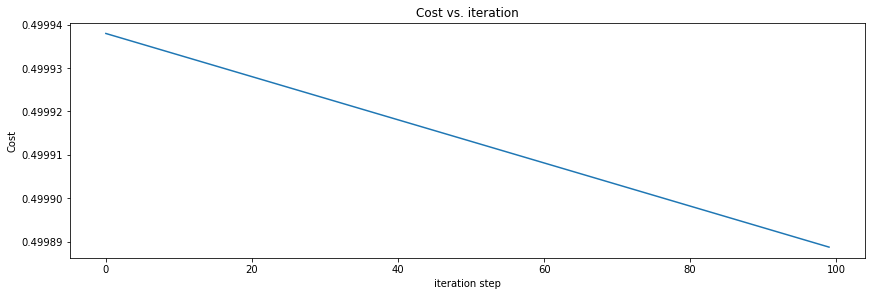

In [73]:
fig, (ax1) = plt.subplots(1, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_hist)
ax1.set_title("Cost vs. iteration")
ax1.set_ylabel('Cost')             
ax1.set_xlabel('iteration step')   
plt.show()